In [1]:
import os
import json

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
kaggle_token={"username":"Aaditi2505","key":"c9d4b15c2a6349574e04b6b7794caed8"}

In [3]:
os.makedirs ('/root/.kaggle',exist_ok=True)
with open("/root/.kaggle/kaggle.json", 'w') as file:
    json.dump(kaggle_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d nicholastj/skin-cancer

Dataset URL: https://www.kaggle.com/datasets/nicholastj/skin-cancer
License(s): unknown
 99% 822M/831M [00:11<00:00, 79.7MB/s]
100% 831M/831M [00:11<00:00, 77.7MB/s]


In [5]:
import zipfile
with zipfile.ZipFile("/content/skin-cancer.zip", 'r') as zip_ref:
    zip_ref.extractall("cancer")
print("Dataset unzipped")

Dataset unzipped


In [10]:
cancer_classes = os.listdir("/content/cancer")
print(" Cancer classes:", cancer_classes)

 Cancer classes: ['Skin Cancer']


In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

# Define IMG_SIZE and BATCH_SIZE before using them
IMG_SIZE = 224
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
'/content/cancer/Skin Cancer',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

Found 2048 images belonging to 4 classes.


In [18]:
val_generator = train_datagen.flow_from_directory(

'/content/cancer/Skin Cancer',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
     subset='validation')

Found 510 images belonging to 4 classes.


In [19]:
 class_names=list(train_generator.class_indices.keys())
 print(class_names)
 print(train_generator.class_indices)

['Test_Data', 'Test_GroundTruth', 'Training_Data', 'Training_GroundTruth']
{'Test_Data': 0, 'Test_GroundTruth': 1, 'Training_Data': 2, 'Training_GroundTruth': 3}


In [20]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
 model.fit(train_generator,epochs=3,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
64/64 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.6043 - loss: 1.0783 - val_accuracy: 0.7020 - val_loss: 0.6327
Epoch 2/3
64/64 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.6891 - loss: 0.6569 - val_accuracy: 0.6745 - val_loss: 0.6579
Epoch 3/3
64/64 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.7039 - loss: 0.6071 - val_accuracy: 0.6922 - val_loss: 0.6311


In [23]:
 model.save('/content/cancer/Skin Cancer/data.h5')

In [28]:
 from tensorflow.keras.models import load_model
 from tensorflow.keras.preprocessing import image
 import matplotlib.pyplot as plt
 import numpy as np
 print('Model Loaded')
 model=load_model("/content/cancer/segmented_images/Alzheimer_model.h5")

Model Loaded


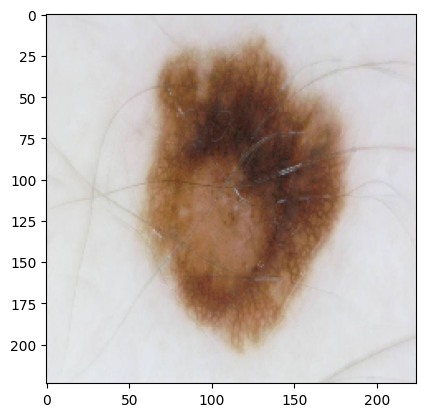

In [30]:
test_image_path="/content/cancer/Skin Cancer/Test_Data/ISIC_0000003.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [31]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255

In [32]:
prediction = model.predict(img_array)
ind=np.argmax(prediction)
prediction=prediction[0][ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


In [33]:
inv_labels = {v: k for k, v in train_generator.class_indices.items()}

predicted_class = inv_labels[ind]
print(" Predicted class:", predicted_class)

 Predicted class: Training_Data


In [35]:
if predicted_class == "NonDemented":
    print(" You do NOT have skin cancer")
else:
    print(f" skin cancer stage detected: {predicted_class}")

 skin cancer stage detected: Training_Data
